# Importing and viewing data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV, ElasticNet, ElasticNetCV, LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline
from scipy.stats import norm

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

%matplotlib inline

In [2]:
#Import train dataset
train = pd.read_csv("../datasets/train.csv")
#Import test dataset
test = pd.read_csv("../datasets/test.csv")

# Exploratory Data Analysis
- **Read the data dictionary.**
- Determine _what_ missing values mean.
- Figure out what each categorical value represents.
- Identify outliers.
- Consider whether discrete values are better represented as categorical or continuous. (Are relationships to the target linear?)

In [3]:
train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [4]:
test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,Fa,Stone,Fa,TA,No,Unf,0,Unf,0,1020,1020,GasA,Gd,N,FuseP,908,1020,0,1928,0,0,2,0,4,2,Fa,9,Typ,0,NaN,Detchd,1910.0,Unf,1,440,Po,Po,Y,0,60,112,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,1967,1967,GasA,TA,Y,SBrkr,1967,0,0,1967,0,0,2,0,6,2,TA,10,Typ,0,NaN,Attchd,1977.0,Fin,2,580,TA,TA,Y,170,0,0,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,Gd,Av,GLQ,554,Unf,0,100,654,GasA,Ex,Y,SBrkr,664,832,0,1496,1,0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2006.0,RFn,2,426,TA,TA,Y,100,24,0,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,TA,CBlock,TA,TA,No,Unf,0,Unf,0,968,968,GasA,TA,Y,SBrkr,968,0,0,968,0,0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1935.0,Unf,2,480,Fa,TA,N,0,0,184,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,TA,TA,CBlock,Gd,TA,No,BLQ,609,Unf,0,785,1394,GasA,Gd,Y,SBrkr,1394,0,0,1394,1,0,1,1,3,1,TA,6,Typ,2,Gd,Attchd,1963.0,RFn,2,514,TA,TA,Y,0,76,0,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [5]:
train.shape

(2051, 81)

In [6]:
test.shape

(878, 80)

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

In [8]:
train.describe()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2051.000000,2.051000e+03,2051.000000,1721.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2029.000000,2050.000000,2050.000000,2050.000000,2050.000000,2051.000000,2051.000000,2051.000000,2051.000000,2049.000000,2049.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,1937.000000,2050.000000,2050.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,1474.033642,7.135900e+08,57.008776,69.055200,10065.208191,6.112140,5.562165,1971.708922,1984.190151,99.695909,442.300488,47.959024,567.728293,1057.987805,1164.488055,329.329108,5.512921,1499.330083,0.427526,0.063446,1.577279,0.371039,2.843491,1.042906,6.435885,0.590931,1978.707796,1.776585,473.671707,93.833740,47.556802,22.571916,2.591419,16.511458,2.397855,51.574354,6.219893,2007.775719,181469.701609
std,843.980841,1.886918e+08,42.824223,23.260653,6742.488909,1.426271,1.104497,30.177889,21.036250,174.963129,461.204124,165.000901,444.954786,449.410704,396.446923,425.671046,51.068870,500.447829,0.522673,0.251705,0.549279,0.501043,0.826618,0.209790,1.560225,0.638516,25.441094,0.764537,215.934561,128.549416,66.747241,59.845110,25.229615,57.374204,37.782570,573.393985,2.744736,1.312014,79258.659352
min,1.000000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,753.500000,5.284581e+08,20.000000,58.000000,7500.000000,5.000000,5.000000,1953.500000,1964.500000,0.000000,0.000000,0.000000,220.000000,793.000000,879.500000,0.000000,0.000000,1129.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,319.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129825.000000
50%,1486.000000,5.354532e+08,50.000000,68.000000,9430.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,368.000000,0.000000,474.500000,994.500000,1093.000000,0.000000,0.000000,1444.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,2198.000000,9.071801e+08,70.000000,80.000000,11513.500000,7.000000,6.000000,2001.000000,2004.000000,161.000000,733.750000,0.000000,811.000000,1318.750000,1405.000000,692.500000,0.000000,1728.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2930.000000,9.241520e+08,190.000000,313.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,5095.000000,1862.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1418.000000,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000,611657.000000


In [9]:
test.describe()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold
count,878.000000,8.780000e+02,878.000000,718.000000,878.000000,878.000000,878.000000,878.000000,878.000000,877.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,833.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000
mean,1444.749431,7.162867e+08,58.268793,69.545961,10307.033030,6.050114,5.566059,1970.492027,1984.417995,106.236032,441.328018,53.896355,539.133257,1034.357631,1145.787016,348.398633,2.728929,1496.914579,0.439636,0.055809,1.539863,0.398633,2.879271,1.047836,6.454442,0.618451,1976.759904,1.742597,470.362187,93.430524,47.070615,24.064920,2.597950,14.830296,1.884966,48.498861,6.202733,2007.825740
std,850.838263,1.889103e+08,42.235407,23.533945,10002.674602,1.369065,1.128903,30.395895,20.450725,187.158908,438.457329,178.632355,426.172161,413.446291,375.264111,432.985566,32.572548,506.468967,0.529948,0.229683,0.559060,0.505927,0.830712,0.223966,1.596632,0.669571,25.689763,0.750391,212.734075,121.181702,68.180939,73.249463,24.962482,53.003794,29.916672,550.169317,2.642498,1.327861
min,2.000000,5.263021e+08,20.000000,21.000000,1477.000000,2.000000,1.000000,1880.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000,0.000000,407.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,692.250000,5.284841e+08,20.000000,59.000000,7297.250000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,216.000000,789.000000,864.000000,0.000000,0.000000,1114.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1960.000000,1.000000,322.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000
50%,1433.000000,5.354542e+08,50.000000,68.000000,9446.000000,6.000000,5.000000,1972.000000,1992.000000,0.000000,373.000000,0.000000,452.000000,975.000000,1063.000000,0.000000,0.000000,1436.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1978.000000,2.000000,473.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2197.500000,9.071904e+08,70.000000,80.000000,11589.000000,7.000000,6.000000,1999.750000,2003.000000,172.000000,734.750000,0.000000,780.000000,1247.000000,1358.000000,720.000000,0.000000,1779.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2001.000000,2.000000,576.000000,170.750000,69.750000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2928.000000,1.007100e+09,190.000000,182.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1378.000000,2288.000000,1526.000000,2046.000000,2630.000000,2674.000000,2065.000000,481.000000,4476.000000,2.000000,1.000000,4.000000,2.000000,6.000000,3.000000,12.000000,3.000000,2010.000000,4.000000,1488.000000,690.000000,742.000000,1012.000000,360.000000,576.000000,555.000000,15500.000000,12.000000,2010.000000


In [10]:
def percent_missing_data(df):
    missing_count = df.isnull().sum().sort_values(ascending = False)
    missing_percent = 100 * df.isna().sum().sort_values(ascending = False) / len(df)
    missing_count = pd.DataFrame(missing_count[missing_count > 0])
    missing_percent = pd.DataFrame(missing_percent[missing_percent > 0])
    missing_table = pd.concat([missing_count,missing_percent], axis = 1)
    missing_table.columns = ["missing_count", "missing_percent"]
    
    return missing_table

In [11]:
percent_missing_data(train)

,missing_count,missing_percent
Pool QC,2042,99.561190
Misc Feature,1986,96.830814
Alley,1911,93.174061
Fence,1651,80.497318
Fireplace Qu,1000,48.756704
Lot Frontage,330,16.089712
Garage Finish,114,5.558264
Garage Qual,114,5.558264
Garage Yr Blt,114,5.558264
Garage Cond,114,5.558264


- There are 26 columns with missing values which consist of Categorical and Continuous features 
- From the data dictionary, it is likely that the missing values in Categorical variables represent houses without the features such as pool or fence
- Similarly, the missing values in continuous variables such as Mas Vnr Area might signify the houses without the features.

In [12]:
#Drop ID, PID as they are both identifier
train_id = train['Id']
test_id = test['Id']
train = train.drop(['PID','Id'], axis = 1)
test = test.drop(['PID','Id'], axis = 1)

In [13]:
#Categorical columns
categorical_col = train.select_dtypes(include = ['object']).columns
categorical_col

Index(['MS Zoning', 'Street', 'Alley', 'Lot Shape', 'Land Contour',
       'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl',
       'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC',
       'Central Air', 'Electrical', 'Kitchen Qual', 'Functional',
       'Fireplace Qu', 'Garage Type', 'Garage Finish', 'Garage Qual',
       'Garage Cond', 'Paved Drive', 'Pool QC', 'Fence', 'Misc Feature',
       'Sale Type'],
      dtype='object')

In [14]:
#Numerical columns
numerical_col = train.select_dtypes(include = ['int64', 'float64']).columns
numerical_col

Index(['MS SubClass', 'Lot Frontage', 'Lot Area', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area',
       'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area',
       'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath',
       'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces',
       'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'Wood Deck SF',
       'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch',
       'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold', 'SalePrice'],
      dtype='object')

## Initial Exploration Visualisation
- Look at distributions.
- Look at correlations.
- Look at relationships to target (scatter plots for continuous, box plots for categorical)

### Distribution

C:\Users\edmun\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


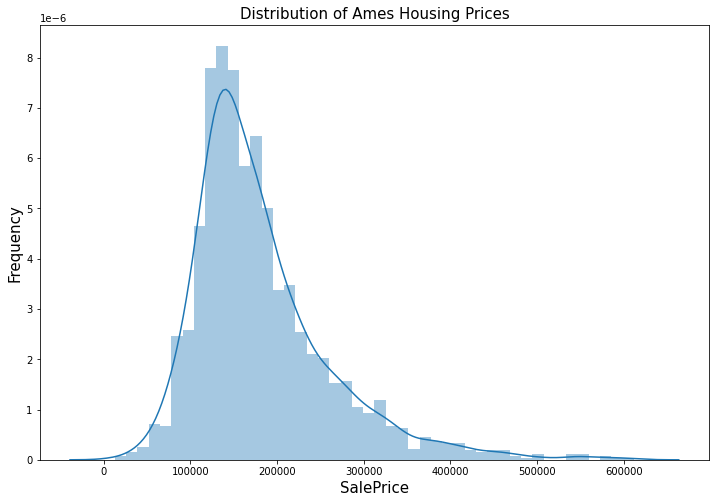

Skewness: 1.557551
Kurtosis: 3.579003


In [15]:
#Plot a histogram of SalePrice to see the distribution
y = train['SalePrice']
fig, ax = plt.subplots(figsize = (12,8))
g = sns.distplot(y)
plt.title("Distribution of Ames Housing Prices", fontsize = 15)
plt.xlabel("SalePrice", fontsize = 15)
plt.ylabel("Frequency", fontsize = 15)
plt.show()

print('Skewness: %f' %  train['SalePrice'].skew())
print('Kurtosis: %f' %  train['SalePrice'].kurtosis())

The histogram has a very long right tail, signifying that it has extreme high value for the sale price.

### Correlation

In [16]:
corr = train.corr()
corr['SalePrice'].sort_values(ascending = False)

SalePrice          1.000000
Overall Qual       0.800207
Gr Liv Area        0.697038
Garage Area        0.650270
Garage Cars        0.648220
Total Bsmt SF      0.628925
1st Flr SF         0.618486
Year Built         0.571849
Year Remod/Add     0.550370
Full Bath          0.537969
Garage Yr Blt      0.533922
Mas Vnr Area       0.512230
TotRms AbvGrd      0.504014
Fireplaces         0.471093
BsmtFin SF 1       0.423519
Lot Frontage       0.341842
Open Porch SF      0.333476
Wood Deck SF       0.326490
Lot Area           0.296566
Bsmt Full Bath     0.283662
Half Bath          0.283001
2nd Flr SF         0.248452
Bsmt Unf SF        0.190210
Bedroom AbvGr      0.137067
Screen Porch       0.134581
3Ssn Porch         0.048732
Mo Sold            0.032735
Pool Area          0.023106
BsmtFin SF 2       0.016255
Misc Val          -0.007375
Yr Sold           -0.015203
Low Qual Fin SF   -0.041594
Bsmt Half Bath    -0.045328
MS SubClass       -0.087335
Overall Cond      -0.097019
Kitchen AbvGr     -0

The variables are sorted in a descending order with **Overall Qual** the most correlated variable. 

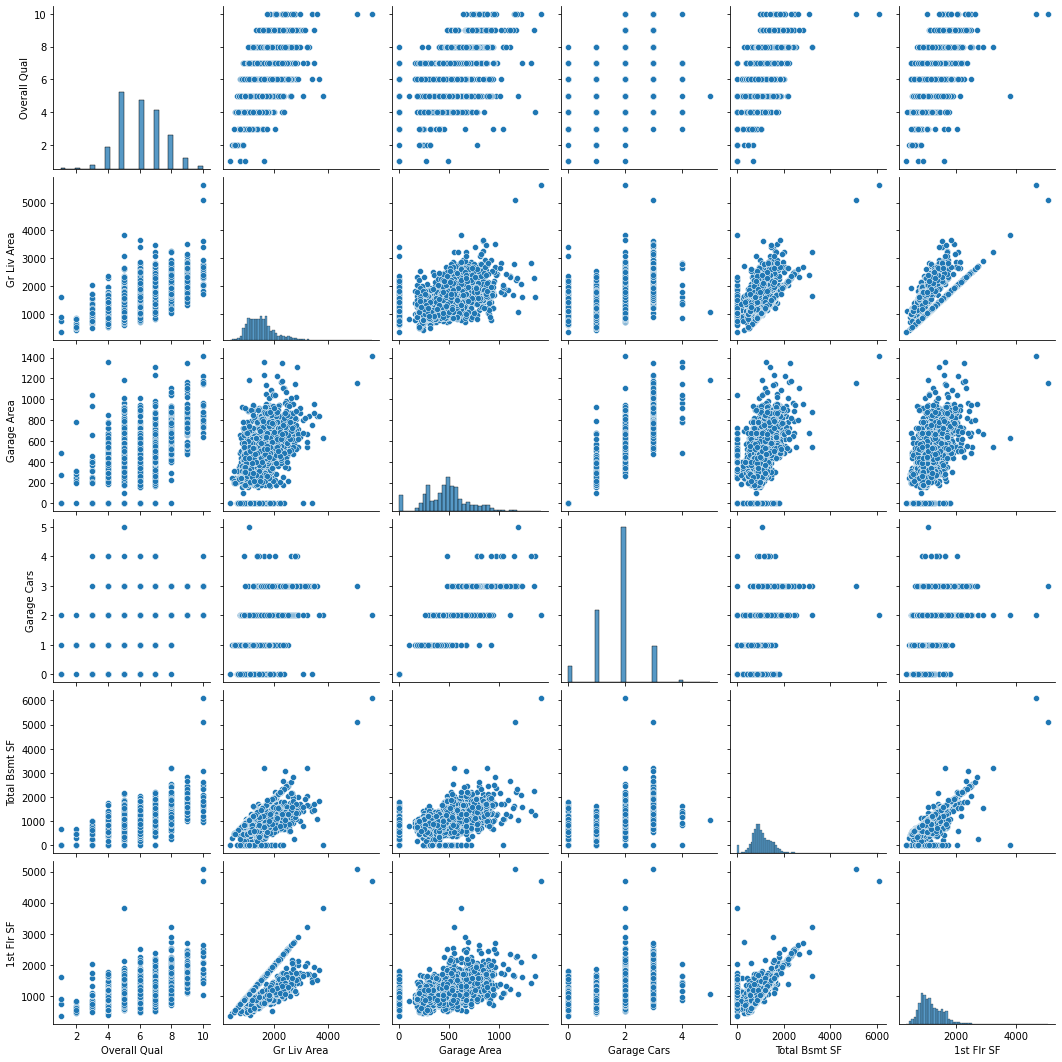

In [17]:
#Plot the highly correlated features to saleprice
cols = ['Overall Qual','Gr Liv Area','Garage Area','Garage Cars','Total Bsmt SF','1st Flr SF']
sns.pairplot(train[cols], height = 2.5)

In [990]:
#Lets split these variables to Categorical variables and Continuous variables
# Categorical variables -> Box Plot
# Continuous variables -> Scatter Plot

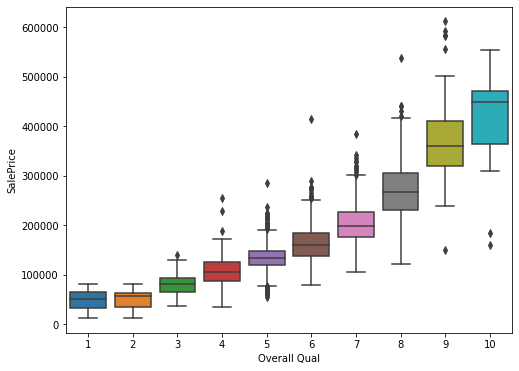

In [991]:
#Box Plot for Overall Qual
fig, ax = plt.subplots(figsize = (8,6))
fig = sns.boxplot(x = 'Overall Qual', y = 'SalePrice', data = train)

In [992]:
continuous_col = ['Gr Liv Area','Garage Area','Total Bsmt SF','1st Flr SF']

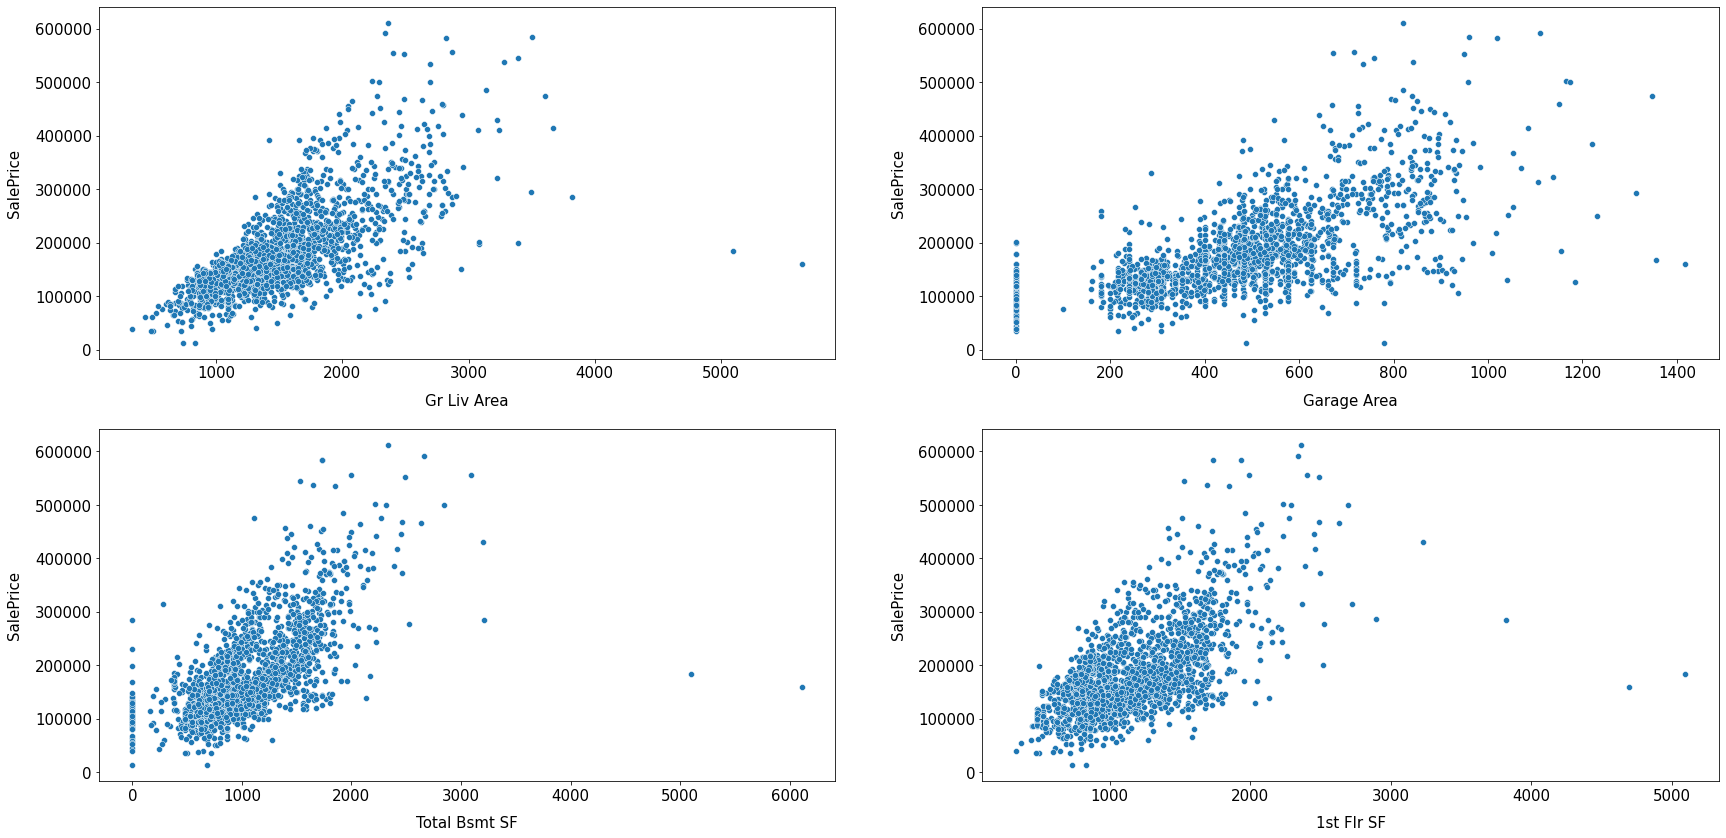

In [993]:
fig, ax = plt.subplots(figsize=(12, 12))
plt.subplots_adjust(right=2)
plt.subplots_adjust(top=2)

for i, feature in enumerate(continuous_col,1):

    plt.subplot(len(continuous_col), 2, i)
    sns.scatterplot(x=feature, y='SalePrice', palette='Blues', data=train)     
    plt.xlabel('{}'.format(feature), size=15,labelpad=12.5)
    plt.ylabel('SalePrice', size=15, labelpad=12.5)
    
    for j in range(2):
        plt.tick_params(axis='x', labelsize=15)
        plt.tick_params(axis='y', labelsize=15)
        
plt.show()

# Data Cleaning
- Decide how to impute null values.
- Decide how to handle outliers.
- Do you want to combine any features?
- Do you want to have interaction terms?
- Do you want to manually drop collinear features?

### Remove outlier
#### Continuous outliers
The data dictionary mention the following: 

SPECIAL NOTES:
There are 5 observations that an instructor may wish to remove from the data set before giving it to students (a plot of SALE PRICE versus GR LIV AREA will indicate them quickly). Three of them are true outliers (Partial Sales that likely don’t represent actual market values) and two of them are simply unusual sales (very large houses priced relatively appropriately). I would recommend removing any houses with more than 4000 square feet from the data set (which eliminates these 5 unusual observations) before assigning it to students.

In [994]:
train.drop(train[train['Gr Liv Area'] > 4000].index,axis = 0, inplace = True)

### Combine Train and Test data
Now that we have removed outlier from Train, we will combine both train and test data to ensure that data cleaning is performed on both Train and test.

It is best to combine the two dataframe, get dummies and then split the dataframes again.

In [995]:
ntrain = train.shape[0]
ntest = test.shape[0]

In [996]:
print(train.shape)
print(test.shape)

(2049, 79)
(878, 78)


In [997]:
#Combine Train, Test dataset, dropping SalePrice Target variable
all_data = pd.concat((train, test)).reset_index(drop=True)
#all_data.drop(['SalePrice'], axis=1, inplace=True)
print(f"The combined dataset has a shape of {all_data.shape}")

The combined dataset has a shape of (2927, 79)


### Impute Missing Data

In [998]:
percent_nan = percent_missing_data(all_data)
percent_nan

,missing_count,missing_percent
Pool QC,2915,99.590024
Misc Feature,2822,96.412709
Alley,2729,93.235395
Fence,2355,80.457807
Fireplace Qu,1422,48.582166
SalePrice,878,29.996584
Lot Frontage,490,16.740690
Garage Finish,159,5.432183
Garage Qual,159,5.432183
Garage Cond,159,5.432183


In [999]:
#Fill following columns with NA accordingly to data description
for col in ['Pool QC','Misc Feature','Alley','Fence','Fireplace Qu']:
    all_data[col] = all_data[col].fillna('NA')

#### Lot frontage

In [1000]:
#Group by neighborhood and fill in missing value by the mean LotFrontage of the neighbourhoods
all_data["Lot Frontage"] = all_data.groupby("Neighborhood")["Lot Frontage"].transform(
    lambda x: x.fillna(x.mean()))

In [1001]:
all_data[all_data['Lot Frontage'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
463,120,RM,NaN,9763,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,GrnHill,Norm,Norm,TwnhsE,1Story,7,5,1998,1998,Gable,CompShg,Wd Sdng,Wd Sdng,BrkFace,239.0,Gd,TA,PConc,Gd,TA,No,GLQ,1102.0,ALQ,72.0,328.0,1502.0,GasA,Ex,Y,SBrkr,1502,0,0,1502,1.0,0.0,1,1,1,1,Gd,5,Typ,1,TA,Attchd,1998.0,Fin,1.0,286.0,TA,TA,Y,0,0,0,0,0,0,NA,NA,NA,0,9,2007,WD,330000.0
1120,160,RH,NaN,3612,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,Landmrk,Norm,Norm,Twnhs,2Story,6,5,1993,1994,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,338.0,Unf,0.0,292.0,630.0,GasA,Ex,Y,SBrkr,630,690,0,1320,0.0,0.0,2,1,3,1,TA,5,Typ,0,NA,Detchd,1993.0,Unf,2.0,484.0,TA,TA,Y,0,48,0,0,0,0,NA,MnPrv,NA,0,6,2006,WD,137000.0
1210,120,RM,NaN,8239,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,GrnHill,Norm,Norm,TwnhsE,1Story,7,5,1986,1986,Gable,CompShg,BrkFace,Wd Sdng,None,0.0,Gd,TA,CBlock,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,Gd,Y,SBrkr,1295,0,0,1295,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NA,Attchd,1986.0,RFn,1.0,312.0,TA,TA,Y,0,0,0,0,0,0,NA,NA,NA,0,11,2006,WD,230000.0


In [1002]:
#Fill remaining with 0
all_data['Lot Frontage'] = all_data['Lot Frontage'].fillna(0)

#### Garage variables

In [1003]:
#Impute NA for Categorical variable
for col in ['Garage Cond','Garage Finish','Garage Qual','Garage Type']:
    all_data[col] = all_data[col].fillna('NA')

#Impute 0 for Numerical variable    
for col in ['Garage Yr Blt','Garage Area','Garage Cars']:
    all_data[col] = all_data[col].fillna(0)

#### Basement variables

In [1004]:
#Impute NA for Categorical variable
for col in ['Bsmt Exposure','BsmtFin Type 2','Bsmt Qual','Bsmt Cond','BsmtFin Type 1']:
    all_data[col] = all_data[col].fillna('NA')
#Impute 0 for Numerical variable
for col in ['Bsmt Half Bath','Bsmt Full Bath','Bsmt Unf SF','Total Bsmt SF','BsmtFin SF 1','BsmtFin SF 2']:
    all_data[col] = all_data[col].fillna(0)

#### Masonry Veneer variables

In [1005]:
#Impute NA for Mas Vnr Type
all_data['Mas Vnr Type'] = all_data['Mas Vnr Type'].fillna('None')
# Replace the 'None' to 'NA'
all_data["Mas Vnr Type"].replace(to_replace=["None"], value="NA", inplace=True)
#Impute 0 for Numerical variable
all_data['Mas Vnr Area'] = all_data['Mas Vnr Area'].fillna(0)

#### Electrical variable

In [1006]:
all_data['Electrical'].value_counts()

SBrkr    2679
FuseA     188
FuseF      50
FuseP       8
Mix         1
Name: Electrical, dtype: int64

In [1007]:
#Fill missing data with most common value (SBrkr)
all_data['Electrical'] = all_data['Electrical'].fillna('SBrkr')

### Transforming some numerical variables that are really categorical

In [1008]:
all_data['MS SubClass'] = train['MS SubClass'].apply(str)
all_data['Overall Cond'] = train['Overall Cond'].apply(str)
all_data['Mo Sold'] = train['Mo Sold'].apply(str)

### Creating new features

We can reduce the number of features in the dataset by providing interactivity between them and creating new features

In [1009]:
all_data.columns

Index(['MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Street',
       'Alley', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config',
       'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st',
       'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air',
       'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual',
       'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Fireplace Qu',
       'Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Gara

In [1010]:
#Create House Age column
def house_age(df):
    df['House Age'] = (df['Yr Sold'] - df['Year Remod/Add'])
    df.drop(columns = ['Yr Sold','Year Remod/Add','Year Built'], inplace = True)

In [1011]:
#Add up the no. of bathrooms together
def total_bathrooms(df):
    df['Total Bathrooms'] = (df['Full Bath'] + (0.5 * df['Half Bath']) + df['Bsmt Full Bath'] + (0.5 * df['Bsmt Half Bath']))
    df.drop(columns = ['Full Bath','Half Bath','Bsmt Full Bath','Bsmt Half Bath'], inplace = True)

In [1012]:
#Add up the SF of the porches together
def total_porch_sf(df):
    df['Total Porch SF'] = (df['Wood Deck SF'] + df['Open Porch SF'] + df['Enclosed Porch'] + df['3Ssn Porch'] + df['Screen Porch'])
    df.drop(columns = ['Wood Deck SF','Open Porch SF','Enclosed Porch','3Ssn Porch','Screen Porch'], inplace = True)

In [1013]:
#Drop these columns as they add up to Gr Liv Area
def drop_floors_SF(df):
    df.drop(columns = ['1st Flr SF','2nd Flr SF','Low Qual Fin SF'], inplace = True)

In [1014]:
#Drop these columns as they add up to Total Bsmt SF
def drop_bsmt_sf(df):
    df.drop(columns = ['BsmtFin SF 1','BsmtFin SF 2','Bsmt Unf SF'], inplace = True)

In [1015]:
house_age(all_data)
total_bathrooms(all_data)
total_porch_sf(all_data)
drop_floors_SF(all_data)
drop_bsmt_sf(all_data)

### Multicollinearity

Text(0.5, 1.0, 'Correlation of numeric features in Ames Housing dataset')

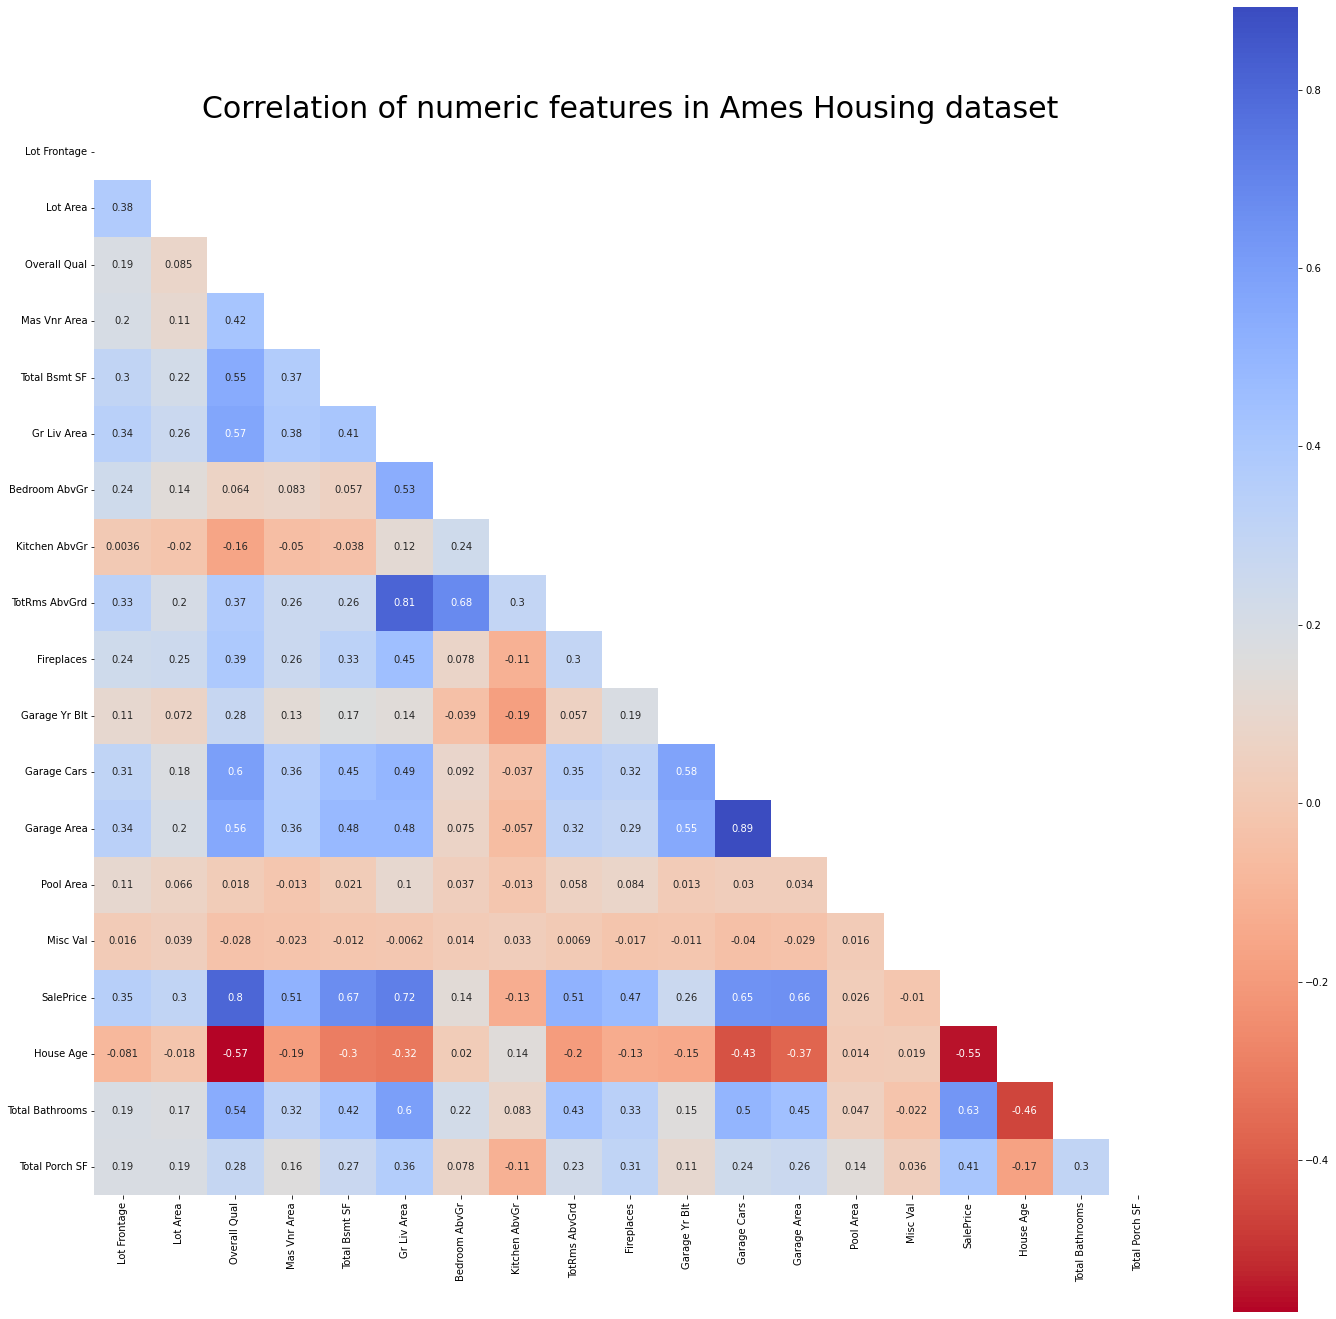

In [1016]:
corr = all_data.corr()

fig, ax = plt.subplots(figsize = (24,24))
#mask for diagonal heatmap
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, 
        mask=mask,
        cmap = 'coolwarm_r',
        annot = True,
        square=True)

ax.tick_params(labelsize=10)
plt.title('Correlation of numeric features in Ames Housing dataset', fontsize=30)

From the heatmap, it is shown that there is multicollinearity between the original features. We will drop 1 feature for every pair of collinearity.
- 81% collinearity between **TotRms AbvGrd** and **Gr Liv Area** (Drop **TotRms AbvGrd**)
- 89% collinearity between **Garage Cars** and **Garage Area** (Drop **Garage Cars**)

In [1017]:
all_data.drop(columns = ['TotRms AbvGrd','Garage Cars'], axis = 1, inplace = True)

# Pre-processing
- One-hot encode categorical variables.
- Train/test split your data.
- Scale your data.
- Consider using automated feature selection.

### Transform Ordinal features to Numeric

In [1018]:
## First, do feature engineering on dataset for the rank-able feature

all_data['Exter Qual'] = all_data['Exter Qual'].map({'NA': 0,'Po': 1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
all_data['Exter Cond'] = all_data['Exter Cond'].map({'NA': 0,'Po': 1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
all_data['Bsmt Qual'] = all_data['Bsmt Qual'].map({'NA': 0,'Po': 1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
all_data['Bsmt Cond'] = all_data['Bsmt Cond'].map({'NA': 0,'Po': 1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
all_data['Bsmt Exposure'] = all_data['Bsmt Exposure'].map({'NA': 0,'No': 1,'Mn':2,'Av':3,'Gd':4})
all_data['BsmtFin Type 1'] = all_data['BsmtFin Type 1'].map({'NA': 0,'Unf': 1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
all_data['BsmtFin Type 2'] = all_data['BsmtFin Type 2'].map({'NA': 0,'Unf': 1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
all_data['Heating QC'] = all_data['Heating QC'].map({'Po': 1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
all_data['Kitchen Qual'] = all_data['Kitchen Qual'].map({'Po': 1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
all_data['Garage Qual'] = all_data['Garage Qual'].map({'NA': 0,'Po': 1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
all_data['Garage Cond'] = all_data['Garage Cond'].map({'NA': 0,'Po': 1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
all_data['Pool QC'] = all_data['Pool QC'].map({'NA': 0,'Fa':2,'TA':3,'Gd':4,'Ex':5})
all_data['Fence'] = all_data['Fence'].map({'NA': 0,'MnWw':1,'GdWo':2,'MnPrv':3,'GdPrv':4})

### Train Test Split

In [1019]:
#Split the combined dataset into the original Train, test dataset
new_train = all_data[:ntrain]
new_test = all_data[ntrain:].drop(columns = 'SalePrice')

In [1020]:
new_train.shape

(2049, 62)

In [1021]:
new_test.shape

(878, 61)

In [1022]:
y = new_train['SalePrice']
X = new_train.drop(columns = 'SalePrice')

In [1023]:
X_train,X_test,y_train,y_test = train_test_split(X,y, random_state = 16)

In [1024]:
print(f"The shape of X_train is {X_train.shape}")
print(f"The shape of X_test is {X_test.shape}")
print(f"The shape of y_train is {y_train.shape}")
print(f"The shape of y_test is {y_test.shape}")

The shape of X_train is (1536, 61)
The shape of X_test is (513, 61)
The shape of y_train is (1536,)
The shape of y_test is (513,)


### One hot encoding of categorical variables

In [1025]:
enc = OneHotEncoder(handle_unknown="ignore", sparse=False)

enc.fit(X_train.select_dtypes(include="object"))

enc_X_train = pd.DataFrame(
    enc.transform(X_train.select_dtypes(include="object")),
    columns=enc.get_feature_names_out(),
)

enc_X_test = pd.DataFrame(
    enc.transform(X_test.select_dtypes(include="object")),
    columns=enc.get_feature_names_out(),
)

enc_test = pd.DataFrame(
    enc.transform(new_test.select_dtypes(include="object")),
    columns=enc.get_feature_names_out(),
)

enc_X_train.index = X_train.index
enc_X_test.index = X_test.index
enc_test.index = new_test.index

### MinMaxScaler of Numerical variables

In [1026]:
scaled = MinMaxScaler()
scaled.fit(X_train.select_dtypes(include=("int64", "float64")))
scaled_X_train = pd.DataFrame(
    scaled.transform(X_train.select_dtypes(include=("int64", "float64"))),
    columns=scaled.get_feature_names_out(),
)
scaled_X_test = pd.DataFrame(
    scaled.transform(X_test.select_dtypes(include=("int64", "float64"))),
    columns=scaled.get_feature_names_out(),
)
scaled_test = pd.DataFrame(
    scaled.transform(new_test.select_dtypes(include=("int64", "float64"))),
    columns=scaled.get_feature_names_out(),
)
scaled_X_train.index = X_train.index
scaled_X_test.index = X_test.index
scaled_test.index = new_test.index


In [1027]:
new_X_train = pd.concat([enc_X_train, scaled_X_train], axis=1)
new_X_test = pd.concat([enc_X_test, scaled_X_test], axis=1)
new_test = pd.concat([enc_test, scaled_test], axis=1)

In [1028]:
print(f'X_train shape is: {new_X_train.shape}')
print(f'y_train shape is: {y_train.shape}')
print(f'X_test shape is: {new_X_test.shape}')
print(f'y_test shape is: {y_test.shape}')

X_train shape is: (1536, 259)
y_train shape is: (1536,)
X_test shape is: (513, 259)
y_test shape is: (513,)


### P-values

In [1029]:
X_p = new_X_train
y_p = y_train
X_p = sm.add_constant(X_p, prepend=True)
model = sm.OLS(y_p, X_p).fit()

In [1030]:
#get p-values into dataframe
d = {}
for i in X_p.columns.tolist():
    d[f'{i}'] = round(model.pvalues[i],3)
p_value= pd.DataFrame(d.items(), columns=['Features', 'p-Value']).sort_values(by = 'p-Value').reset_index(drop=True)

In [1031]:
p_value.shape

(260, 2)

In [1032]:
p_value[p_value['p-Value'] < 0.05]

,Features,p-Value
0,Total Porch SF,0.000
1,Neighborhood_CollgCr,0.000
2,Neighborhood_Edwards,0.000
3,Total Bsmt SF,0.000
4,Neighborhood_GrnHill,0.000
5,Neighborhood_NAmes,0.000
6,Neighborhood_NWAmes,0.000
7,Neighborhood_NridgHt,0.000
8,Neighborhood_OldTown,0.000
9,Neighborhood_SawyerW,0.000


## 5. Modelling
- **Establish your baseline score.**
- Fit linear regression. Look at your coefficients. Are any of them wildly overblown?
- Fit lasso/ridge/elastic net with default parameters.
- Go back and remove features that might be causing issues in your models.
- Tune hyperparameters.
- **Identify a production model.** (This does not have to be your best performing Kaggle model, but rather the model that best answers your problem statement.)
- Refine and interpret your production model.

### Linear Regression Model

In [1033]:
lr = LinearRegression()
lr.fit(new_X_train,y_train)

LinearRegression()

In [1034]:
y_train_pred_lr = lr.predict(new_X_train)
y_test_pred_lr = lr.predict(new_X_test)

In [1035]:
lr_mse_train = mean_squared_error(y_train, y_train_pred_lr)
lr_mse_test = mean_squared_error(y_test, y_test_pred_lr)
lr_perc_diff = (lr_mse_train - lr_mse_test)/lr_mse_train * 100

print(f'MSE on Training set: {lr_mse_train}')
print(f'MSE on Testing set: {lr_mse_test}')
print(f'Percentage difference between MSE of Training and Testing set: {str(lr_perc_diff)+"%"}')
print('R2 score: ', lr.score(new_X_train, y_train))

MSE on Training set: 458183084.0442708
MSE on Testing set: 2.3368677357029232e+30
Percentage difference between MSE of Training and Testing set: -5.100292474955555e+23%
R2 score:  0.9288249675932577


### Gridsearch CV

In [1036]:
# Initialze the estimators
model1 = LinearRegression()
model2 = Ridge()
model3 = Lasso()
model4 = ElasticNet()

# Initialize the hyperparameters for each dictionary
param1 = {}
param1['classifier'] = [model1]

param2 = {}
param2['classifier__alpha'] = [0.01, 0.1, 1, 10, 100,1000]
param2['classifier'] = [model2]
param2["classifier__max_iter"] = [10000]

param3 = {}
param3['classifier__alpha'] = [0.01, 0.1, 1, 10, 100,1000]
param3['classifier'] = [model3]
param3["classifier__max_iter"] = [10000]

pipeline = Pipeline([('classifier', model1)]) #for starting from model1
params = [param1, param2, param3]     #multiple params will do the job of passing thorugh each model here

In [1037]:
# run GridsearchCV
gs = GridSearchCV(pipeline, params, cv=3, n_jobs=-1, scoring='neg_mean_squared_error')

In [1038]:
gs.fit(new_X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('classifier', LinearRegression())]),
             n_jobs=-1,
             param_grid=[{'classifier': [LinearRegression()]},
                         {'classifier': [Ridge()],
                          'classifier__alpha': [0.01, 0.1, 1, 10, 100, 1000],
                          'classifier__max_iter': [10000]},
                         {'classifier': [Lasso(alpha=100, max_iter=10000)],
                          'classifier__alpha': [0.01, 0.1, 1, 10, 100, 1000],
                          'classifier__max_iter': [10000]}],
             scoring='neg_mean_squared_error')

In [1039]:
#evaluation
gs.best_params_

{'classifier': Lasso(alpha=100, max_iter=10000),
 'classifier__alpha': 100,
 'classifier__max_iter': 10000}

In [1040]:
# check for generalisation
y_train_pred = gs.predict(new_X_train)
y_test_pred = gs.predict(new_X_test)

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

perc_diff = (mse_train - mse_test) / mse_train * 100
print(mse_train, mse_test, str(perc_diff) + "%")

547089554.8967557 559205292.7199996 -2.21458035796905%


In [1041]:
gs.best_estimator_

Pipeline(steps=[('classifier', Lasso(alpha=100, max_iter=10000))])

In [1042]:
pd.DataFrame(gs.cv_results_).sort_values('rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier,param_classifier__alpha,param_classifier__max_iter,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
11,0.165896,0.038699,0.021269,0.005428,"Lasso(alpha=100, max_iter=10000)",100,10000,"{'classifier': Lasso(alpha=100, max_iter=10000...",-6.901162e+08,-6.595282e+08,-6.792819e+08,-6.763088e+08,1.266326e+07,1
3,0.043171,0.003318,0.009309,0.006633,Ridge(),1,10000,"{'classifier': Ridge(), 'classifier__alpha': 1...",-7.513292e+08,-6.554321e+08,-7.210247e+08,-7.092620e+08,4.002363e+07,2
4,0.034769,0.004096,0.020829,0.007366,Ridge(),10,10000,"{'classifier': Ridge(), 'classifier__alpha': 1...",-7.356688e+08,-7.462716e+08,-7.413074e+08,-7.410826e+08,4.331517e+06,3
10,0.983894,0.520000,0.016738,0.001564,"Lasso(alpha=100, max_iter=10000)",10,10000,"{'classifier': Lasso(alpha=100, max_iter=10000...",-9.616742e+08,-6.607372e+08,-7.482720e+08,-7.902278e+08,1.263883e+08,4
2,0.059507,0.012938,0.013301,0.002352,Ridge(),0.1,10000,"{'classifier': Ridge(), 'classifier__alpha': 0...",-9.819858e+08,-6.976932e+08,-7.765686e+08,-8.187492e+08,1.198332e+08,5


### Determining Coefficients

In [1043]:
ls = Lasso(alpha=100, max_iter=5000)
ls.fit(new_X_train, y_train)

Lasso(alpha=100, max_iter=5000)

In [1044]:
coeff_df = pd.DataFrame(columns = ['Features','Coeff'])
coeff_df['Coeff'] = ls.coef_
coeff_df['Features'] = new_X_train.columns

In [1045]:
print(f"Lasso picked {sum(coeff_df['Coeff'] != 0)} variables and eliminate the other {sum(coeff_df['Coeff'] == 0)} variables")

Lasso picked 103 variables and eliminate the other 156 variables


In [1046]:
#coeff_df[coeff_df['Coeff'] != 0].sort_values(by = 'Coeff', ascending = False)

In [1047]:
coeff_df_p = pd.merge(coeff_df, p_value, on="Features", how="outer")

In [1048]:
#Select features with p-Value < 0.05 and Coeff that are not 0
new_coeff_df_p = coeff_df_p[
    (coeff_df_p['p-Value'] < 0.05) & ( coeff_df_p['Coeff'] != 0)].sort_values(by = 'Coeff', ascending = False).reset_index(drop = True)

In [1049]:
new_coeff_df_p

,Features,Coeff,p-Value
0,Gr Liv Area,162547.725704,0.000
1,Overall Qual,70268.495539,0.000
2,Total Bsmt SF,61103.750066,0.000
3,Garage Area,43109.437185,0.000
4,Neighborhood_GrnHill,42472.740575,0.000
5,Neighborhood_StoneBr,36803.782764,0.000
6,Total Porch SF,34240.584836,0.000
7,Neighborhood_NridgHt,32993.360919,0.000
8,Total Bathrooms,32540.066860,0.000
9,Mas Vnr Area,31909.596612,0.000


In [1050]:
d = {}
for col in new_coeff_df_p['Features'].to_list():
    try:
        r = coeff_df_p.loc[coeff_df_p['Features'] == col, 'Coeff'].values / (X_train[col].max() - X_train[col].min())
        d[col] = r[0]
        # print(f"{col} : {r}")
    except:
        d[col] = coeff_df_p.loc[coeff_df_p['Features'] == col, 'Coeff'].values[0]
        continue


In [1051]:
#Dataframe of Features with their corresponding coefficients
df_fea = pd.DataFrame(d.items(), columns = ['Features','Coeff']).reset_index(drop = True)
df_fea.sort_values(by = 'Coeff', ascending = False).reset_index(drop = True)

,Features,Coeff
0,Neighborhood_GrnHill,42472.740575
1,Neighborhood_StoneBr,36803.782764
2,Neighborhood_NridgHt,32993.360919
3,Roof Matl_WdShngl,25421.619744
4,Neighborhood_NoRidge,22542.645111
5,Bldg Type_1Fam,18974.597853
6,Exterior 1st_BrkFace,14709.136142
7,Condition 1_PosN,14206.993933
8,Functional_Typ,13043.871488
9,Land Contour_HLS,11529.381465


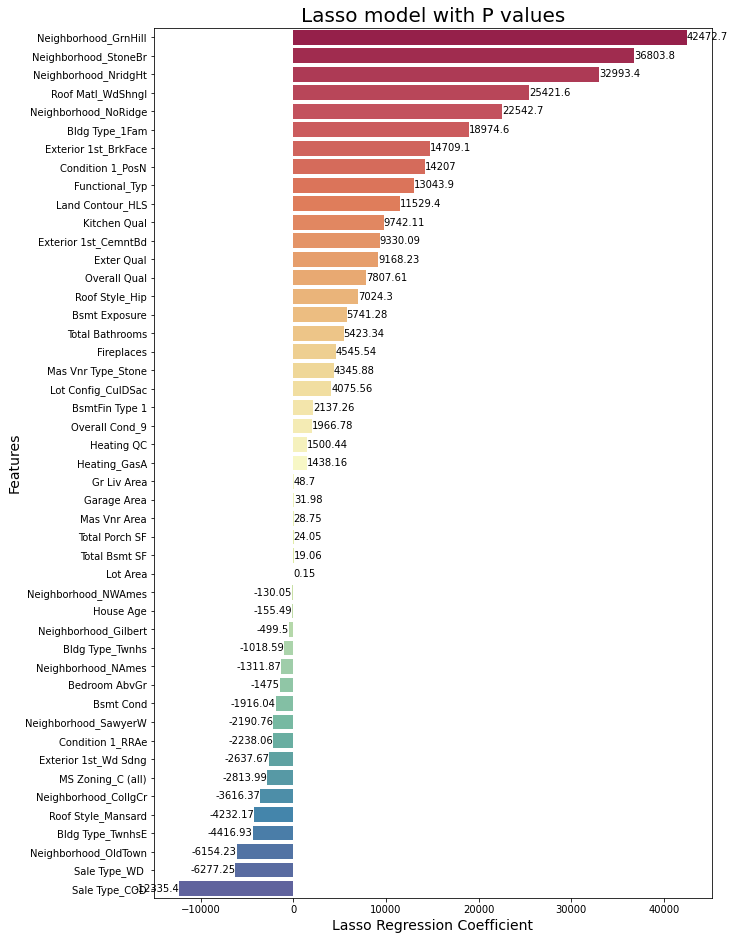

In [1060]:
#Plot Lasso model with P values
plt.figure(figsize=(10,16))
data = round(df_fea.sort_values(by='Coeff',ascending=False),2)
ax = sns.barplot(
    data= data,
    y="Features",
    x= 'Coeff',
    palette = 'Spectral'
)

ax.bar_label(ax.containers[0])
ax.set_ylabel('Features', fontsize=14)
ax.set_xlabel('Lasso Regression Coefficient', fontsize=14)
#ax.set_xlim(-4000, 10000)
plt.title('Lasso model with P values', fontsize=20)
plt.show()

## Inferential Visualizations
- LINE assumptions
- Look at feature loadings.
- Look at how accurate your predictions are.
- Is there a pattern to your errors? Consider reworking your model to address this.

In [1053]:
resids = y_test_pred - y_test

#### Linearity
Strong linear correlation between model prediction and actual sale price

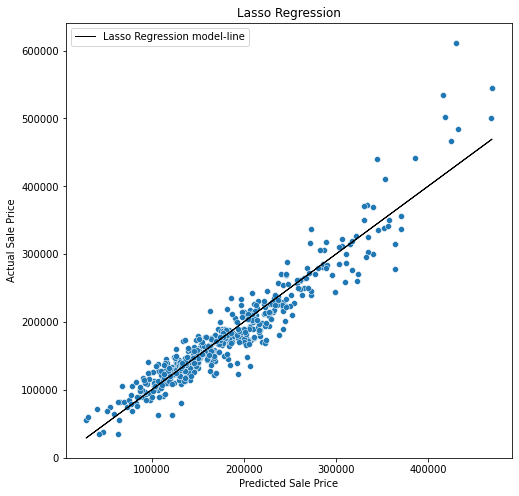

In [1054]:
plt.subplots(figsize=(8,8))
sns.scatterplot(x=y_test_pred, y=y_test)
plt.xlabel("Predicted Sale Price")
plt.ylabel("Actual Sale Price")
plt.title("Lasso Regression")
plt.plot(y_test_pred, y_test_pred, color = "k", linewidth=1, label="Lasso Regression model-line")
plt.legend(loc="upper left");

#### Independence
The Train dataset and test dataset observations are independent of one another

#### Normality
Residuals are normally distributed

C:\Users\edmun\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Error Normality Check')

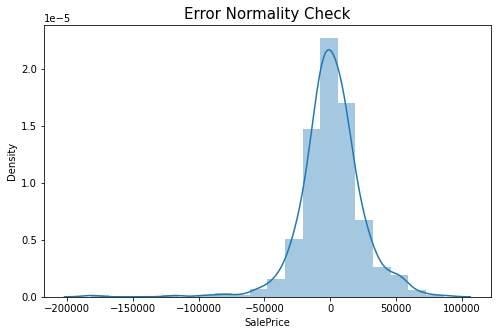

In [1055]:
fig,ax = plt.subplots(figsize=(8,5))
sns.distplot(resids,bins=20)
plt.title('Error Normality Check',size=15)

#### Equal variance/ Homoscedesticity
Residuals are equally distributed which supports the assumption of homoscedasticity.

Text(0.5, 1.0, 'Equal Variance Test')

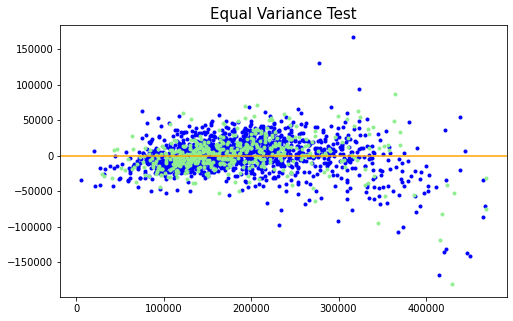

In [1056]:
#Equal variance error
fig,ax = plt.subplots(figsize=(8,5))
plt.scatter(y_train_pred, y_train_pred - y_train, c = 'blue', marker = ".", label = "Training data")
plt.scatter(y_test_pred, y_test_pred - y_test, c = 'lightgreen', marker = ".", label = "Testing data")        
plt.axhline(0,color='orange')
plt.title('Equal Variance Test',size=15)

## Predicting Test result

In [1057]:
new_test.head()

,MS SubClass_120,MS SubClass_150,MS SubClass_160,MS SubClass_180,MS SubClass_190,MS SubClass_20,MS SubClass_30,MS SubClass_40,MS SubClass_45,MS SubClass_50,MS SubClass_60,MS SubClass_70,MS SubClass_75,MS SubClass_80,MS SubClass_85,MS SubClass_90,MS SubClass_nan,MS Zoning_A (agr),MS Zoning_C (all),MS Zoning_FV,MS Zoning_I (all),MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_NA,Alley_Pave,Lot Shape_IR1,Lot Shape_IR2,Lot Shape_IR3,Lot Shape_Reg,Land Contour_Bnk,Land Contour_HLS,Land Contour_Low,Land Contour_Lvl,Utilities_AllPub,Utilities_NoSeWa,Utilities_NoSewr,Lot Config_Corner,Lot Config_CulDSac,Lot Config_FR2,Lot Config_FR3,Lot Config_Inside,Land Slope_Gtl,Land Slope_Mod,Land Slope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition 1_Artery,Condition 1_Feedr,Condition 1_Norm,Condition 1_PosA,Condition 1_PosN,Condition 1_RRAe,Condition 1_RRAn,Condition 1_RRNe,Condition 1_RRNn,Condition 2_Artery,Condition 2_Feedr,Condition 2_Norm,Condition 2_PosA,Condition 2_PosN,Condition 2_RRAe,Condition 2_RRNn,Bldg Type_1Fam,Bldg Type_2fmCon,Bldg Type_Duplex,Bldg Type_Twnhs,Bldg Type_TwnhsE,House Style_1.5Fin,House Style_1.5Unf,House Style_1Story,House Style_2.5Fin,House Style_2.5Unf,House Style_2Story,House Style_SFoyer,House Style_SLvl,Overall Cond_1,Overall Cond_2,Overall Cond_3,Overall Cond_4,Overall Cond_5,Overall Cond_6,Overall Cond_7,Overall Cond_8,Overall Cond_9,Overall Cond_nan,Roof Style_Flat,Roof Style_Gable,Roof Style_Gambrel,Roof Style_Hip,Roof Style_Mansard,Roof Style_Shed,Roof Matl_CompShg,Roof Matl_Membran,Roof Matl_Tar&Grv,Roof Matl_WdShake,Roof Matl_WdShngl,Exterior 1st_AsbShng,Exterior 1st_BrkComm,Exterior 1st_BrkFace,Exterior 1st_CBlock,Exterior 1st_CemntBd,Exterior 1st_HdBoard,Exterior 1st_ImStucc,Exterior 1st_MetalSd,Exterior 1st_Plywood,Exterior 1st_Stone,Exterior 1st_Stucco,Exterior 1st_VinylSd,Exterior 1st_Wd Sdng,Exterior 1st_WdShing,Exterior 2nd_AsbShng,Exterior 2nd_AsphShn,Exterior 2nd_Brk Cmn,Exterior 2nd_BrkFace,Exterior 2nd_CBlock,Exterior 2nd_CmentBd,Exterior 2nd_HdBoard,Exterior 2nd_ImStucc,Exterior 2nd_MetalSd,Exterior 2nd_Plywood,Exterior 2nd_Stone,Exterior 2nd_Stucco,Exterior 2nd_VinylSd,Exterior 2nd_Wd Sdng,Exterior 2nd_Wd Shng,Mas Vnr Type_BrkCmn,Mas Vnr Type_BrkFace,Mas Vnr Type_NA,Mas Vnr Type_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Central Air_N,Central Air_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sal,Functional_Sev,Functional_Typ,Fireplace Qu_Ex,Fireplace Qu_Fa,Fireplace Qu_Gd,Fireplace Qu_NA,Fireplace Qu_Po,Fireplace Qu_TA,Garage Type_2Types,Garage Type_Attchd,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Type_Detchd,Garage Type_NA,Garage Finish_Fin,Garage Finish_NA,Garage Finish_RFn,Garage Finish_Unf,Paved Drive_N,Paved Drive_P,Paved Drive_Y,Misc Feature_Gar2,Misc Feature_NA,Misc Feature_Othr,Misc Feature_Shed,Mo Sold_1,Mo Sold_10,Mo Sold_11,Mo Sold_12,Mo Sold_2,Mo Sold_3,Mo Sold_4,Mo Sold_5,Mo Sold_6,Mo Sold_7,Mo Sold_8,Mo Sold_9,Mo Sold_nan,Sale Type_COD,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_WD,Lot Frontage,Lot Area,Overall Qual,Mas Vnr Area,Exter Qual,Exter Cond,Bsmt Qual,Bsmt Cond,Bsmt Exposure,B

In [1061]:
lasso = Lasso(alpha=100)
lasso_model = lasso.fit(new_X_train,y_train)
sales_predict = lasso_model.predict(new_test)

In [1062]:
sub = pd.DataFrame()
sub['Id'] = test_id
sub['SalePrice'] = sales_predict
sub.to_csv('../datasets/submission.csv',index=False)

In [1063]:
print("Public Score:",20284.29720," ","Private Score:",26795.42244)

Public Score: 20284.2972   Private Score: 26795.42244


## Recommendations and Limitation
- Which features appear to add the most value to a home?
- Which features hurt the value of a home the most?
- What are things that homeowners could improve in their homes to increase the value?
- What neighborhoods seem like they might be a good investment?
- Do you feel that this model will generalize to other cities? How could you revise your model to make it more universal OR what date would you need from another city to make a comparable model?

In [1064]:
#Dataframe of Features with their corresponding coefficients
df_fea = pd.DataFrame(d.items(), columns = ['Features','Per unit change']).reset_index(drop = True)
df_fea.sort_values(by = 'Per unit change', ascending = False).reset_index(drop = True)

,Features,Per unit change
0,Neighborhood_GrnHill,42472.740575
1,Neighborhood_StoneBr,36803.782764
2,Neighborhood_NridgHt,32993.360919
3,Roof Matl_WdShngl,25421.619744
4,Neighborhood_NoRidge,22542.645111
5,Bldg Type_1Fam,18974.597853
6,Exterior 1st_BrkFace,14709.136142
7,Condition 1_PosN,14206.993933
8,Functional_Typ,13043.871488
9,Land Contour_HLS,11529.381465


The cost impact per unit change of each variables is shown on the table above. 

In essence, neighbourhoods are a key features in house prices with houses from Green Hill, Stone Brook, Northridge Heights and North Ridge tend to fetch a higher average sale price of about $\$$20,000 to $\$$40,000 with all else being equal. 
Building type such as 1Fam (Single-family detached) and Hill side properties also add value to the home significantly

Conversely, houses sold under Warranty Deed and Court officer deed also hurt the value of a home.

Home improvement projects such as upgrading the roof material to Wood Shingles can improve the house value by about $\$$25,000. By adding an additional fireplace or bathrooms, homeowners can also bump up the price by $\$$5,000.

Although this model generalise well to the City of Ames, it might not perform as well on other cities due to a difference in features such as the neighbourhoods. To make this model more universal, we will have to eliminate features that are unique to Ames such as the Neighbourhoods. Other features such as fireplace or porch may not be useful to other cities which have no need for them due to the weather or housing style. 